Graham Scan is an algorithm for finding Convex Hull

Algorithm stems
1. Find lowest point P0, if multiple, left most
2. Sort (all other) points based on the angle with x-axis and P0
3. Scan:
    3.1) Push P0 and 1st Point from sorted queue in 'hull stack'
	3.2) Iterate through all rest points in sorted Queue, if Ps2Ps1 -> Ps1Pi is a left turn, push P in stack, progress
	if right turn, keep removing items from 'hull stack', until it's Ps2Ps1 -> Ps1Pi a left turn.

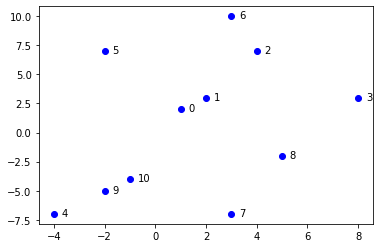

In [38]:
# setup for the problem
from matplotlib import pyplot as plt
import numpy as np

input = [[1,2], [2,3], [4,7], [8, 3], [-4, -7], [-2, 7], [3, 10], [3, -7], [5, -2], [-2, -5], [-1, -4]]

%matplotlib inline
#display input
xs, ys = zip(*input)
plt.plot(xs, ys, 'bo')

def plot_points_index(points):
    stepX = 0.3
    stepY = -0.2
    for i in range(len(points)):
        plt.text(points[i][0] + stepX, points[i][1] + stepY, str(i))
        
plot_points_index(input)

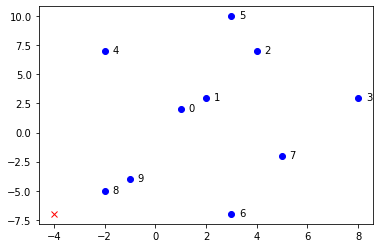

In [39]:
# 1.Find lowest point P0, if multiple, left most
p0Index = 0
for i in range(1, len(input)):
    if input[i][1] < input[p0Index][1]: # p has a lower 'y'
        p0Index = i
    elif input[i][1] == input[p0Index][1] and input[i][0] < input[p0Index][0]: # p has the same 'y', and has low x
        p0Index = i

p0 = input[p0Index]
rest = input[:p0Index] + input[p0Index+1:]

# display p0 and the rest
rxs, rys = zip(*rest)
plt.plot(rxs, rys, 'bo')
plot_points_index(rest)

plt.plot([p0[0]], [p0[1]], 'rx')


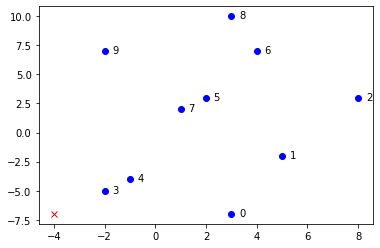

In [42]:
# 2. Sort (all other) points based on the angle with x-axis and P0
from functools import cmp_to_key

# the comparer that returns:
#   true if angle from 'from' to 'p1' < 'from' to 'p2'
#           or if angle to p1 == angle to p2, distance[from to p1] <= distance[from to p2]
#   false otherwise
# note: the angle starts from due-east or in another name: x-axis
def compare(fromP, p1, p2):
    angle1 = np.arctan2(p1[1] - fromP[1], p1[0] - fromP[0])
    angle2 = np.arctan2(p2[1] - fromP[1], p2[0] - fromP[0])
    if angle1 < angle2:
        return -1.0
    elif angle1 == angle2:
        return np.linalg.norm(np.array(fromP) - np.array(p1)) - np.linalg.norm(np.array(fromP) - np.array(p2))
    else:
        return 1.0

sorted_points = sorted(rest, key=cmp_to_key(functools.partial(compare, p0)))
sxs, sys = zip(*sorted_points)
plt.plot(sxs, sys, 'bo')
plot_points_index(sorted_points)

plt.plot([p0[0]], [p0[1]], 'rx')

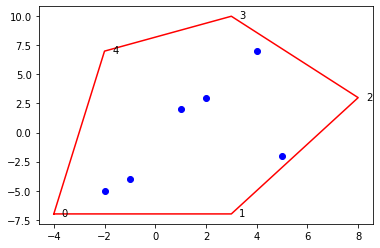

In [46]:
#3. Scan:
#    3.1) Push P0 and 1st Point from sorted queue in 'hull stack'
hullStack = [p0, sorted_points[0]]

#    3.2) Iterate through all rest points in sorted Queue,
#         if Ps2Ps1 -> Ps1Pi is a left turn, push P in stack, progress
#         if right turn, keep removing items from 'hull stack', until it's Ps2Ps1 -> Ps1Pi a left turn.

# this function determines if from pa -> pb to pb -> pc is a left turn
def isLeftTurn(pa, pb, pc):
    vab = np.subtract(pb, pa)
    vbc = np.subtract(pc, pb)
    yawAb = np.arctan2(vab[1], vab[0])
    yawBc = np.arctan2(vbc[1], vbc[0])
    yawDiff = np.mod(yawBc - yawAb, 2 * np.pi)
    return yawDiff < np.pi

nonHullPoints = []
for pi in sorted_points[1:]:
    ps2 = hullStack[-2]
    ps1 = hullStack[-1]
    if not isLeftTurn(ps2, ps1, pi):
        # pop out last element of the stack, until it's v1 -> v2 is a left turn or there's only 2 items left
        nonHullPoints.append(hullStack[-1])
        hullStack = hullStack[:-1]
        while(len(hullStack) > 2):
            if isLeftTurn(hullStack[-2], hullStack[-1], pi):
                break
            else:
                nonHullPoints.append(hullStack[-1])
                hullStack = hullStack[:-1]
    
    # push the point to the stack
    hullStack.append(pi)
            
# hullStack contains all convex hull points. For plotting a full polygon, I appended first point to the end.
hxs, hys = zip(*(hullStack + hullStack[:1]))
plt.plot(hxs, hys, 'r-')
plot_points_index(hullStack)

nxs, nys = zip(*nonHullPoints)
plt.plot(nxs, nys, 'bo')